In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Spark+/Recruitment_Tasks/cifar10-resnet50"

Mounted at /content/drive
/content/drive/MyDrive/Spark+/Recruitment_Tasks/cifar10-resnet50


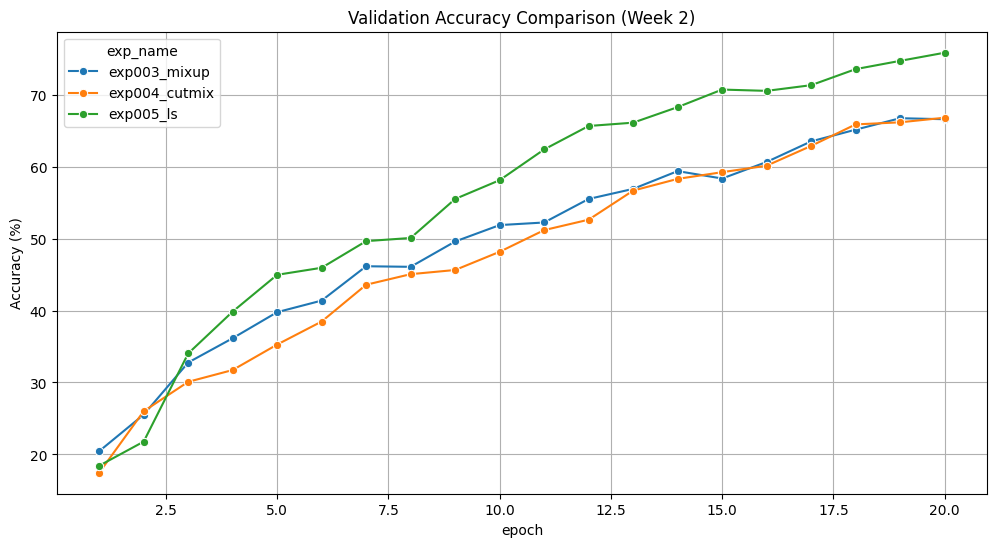

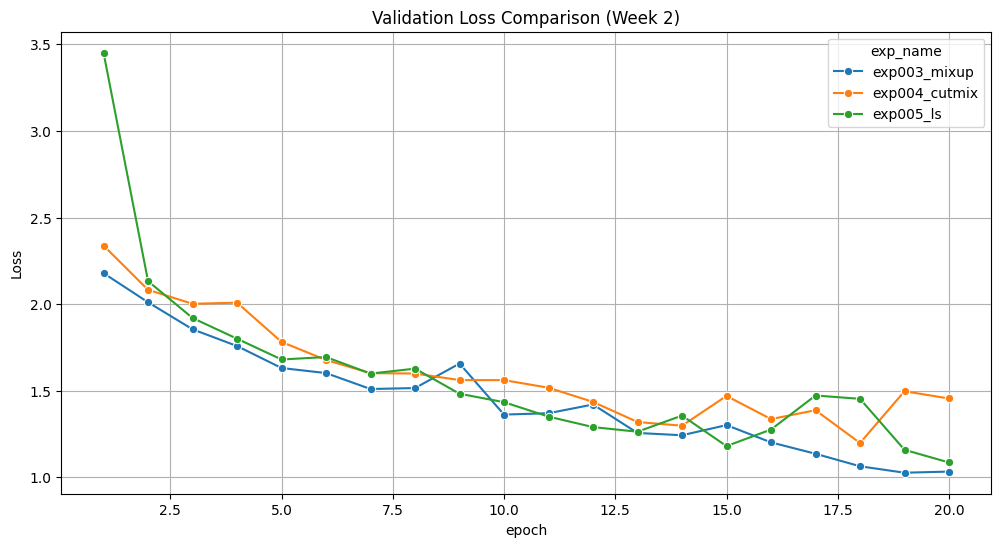

=== Experiment Summary ===
               train_acc  val_acc  val_loss        gap
exp_name                                              
exp003_mixup   50.601071    66.58  1.033288  15.978929
exp004_cutmix  45.025137    66.79  1.455341  21.764863
exp005_ls      76.664000    75.82  1.085781  -0.844000


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_history(exp_name):
    path = os.path.join('runs', exp_name, 'history.csv')
    if os.path.exists(path):
        df = pd.read_csv(path)
        df['exp_name'] = exp_name
        df['epoch'] = df.index + 1
        return df
    return None

# 1. データの読み込み
experiments = ['exp003_mixup', 'exp004_cutmix', 'exp005_ls']
dfs = [load_history(e) for e in experiments]
dfs = [df for df in dfs if df is not None]
all_data = pd.concat(dfs)

# 2. 可視化：Accuracy の比較
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_data, x='epoch', y='val_acc', hue='exp_name', marker='o')
plt.title('Validation Accuracy Comparison (Week 2)')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.savefig('comparison_val_acc.png')
plt.show()

# 3. 可視化：Loss の比較
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_data, x='epoch', y='val_loss', hue='exp_name', marker='o')
plt.title('Validation Loss Comparison (Week 2)')
plt.ylabel('Loss')
plt.grid(True)
plt.savefig('comparison_val_loss.png')
plt.show()

# 4. 指標の要約と CSV 出力
summary = all_data.groupby('exp_name').last()[['train_acc', 'val_acc', 'val_loss']]
summary['gap'] = summary['val_acc'] - summary['train_acc']
print("=== Experiment Summary ===")
print(summary)
summary.to_csv('final_experiment_summary.csv')

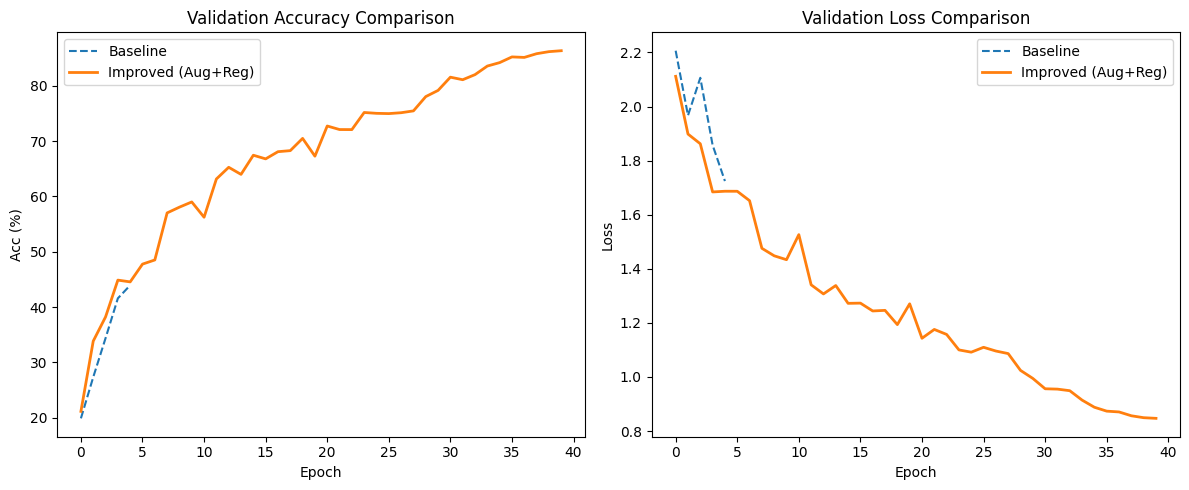

Baseline Max Acc: 43.95%
Improved Max Acc: 86.32%


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# データの読み込み
baseline_path = 'runs/exp002_baseline_aug/history.csv' # 前回のベースライン
improved_path = 'runs/aug_reg/history.csv'

df_base = pd.read_csv(baseline_path)
df_imp = pd.read_csv(improved_path)

# 比較グラフ
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(df_base['val_acc'], label='Baseline', linestyle='--')
plt.plot(df_imp['val_acc'], label='Improved (Aug+Reg)', linewidth=2)
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Acc (%)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df_base['val_loss'], label='Baseline', linestyle='--')
plt.plot(df_imp['val_loss'], label='Improved (Aug+Reg)', linewidth=2)
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('Validation_comparison.png')
plt.show()

print(f"Baseline Max Acc: {df_base['val_acc'].max():.2f}%")
print(f"Improved Max Acc: {df_imp['val_acc'].max():.2f}%")

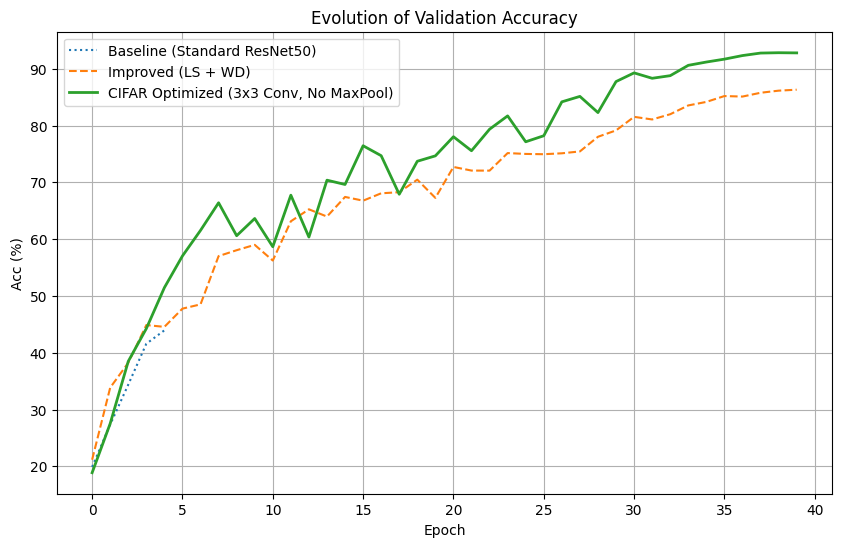

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 履歴の読み込み
h1 = pd.read_csv('runs/exp002_baseline_aug/history.csv') # Week 1-2
h2 = pd.read_csv('runs/aug_reg/history.csv')             # Week 3-1
h3 = pd.read_csv('runs/cifar_optimized/history.csv')     # Week 3-2 (今回)

plt.figure(figsize=(10, 6))
plt.plot(h1['val_acc'], label='Baseline (Standard ResNet50)', linestyle=':')
plt.plot(h2['val_acc'], label='Improved (LS + WD)', linestyle='--')
plt.plot(h3['val_acc'], label='CIFAR Optimized (3x3 Conv, No MaxPool)', linewidth=2)

plt.title('Evolution of Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc (%)')
plt.legend()
plt.grid(True)
plt.savefig('evolution_comparison.png')
plt.show()

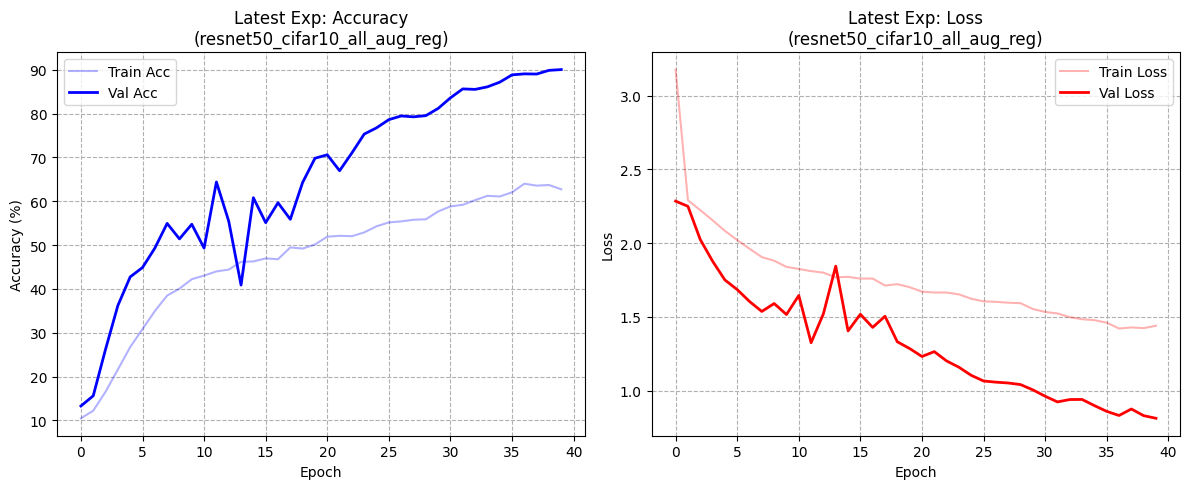

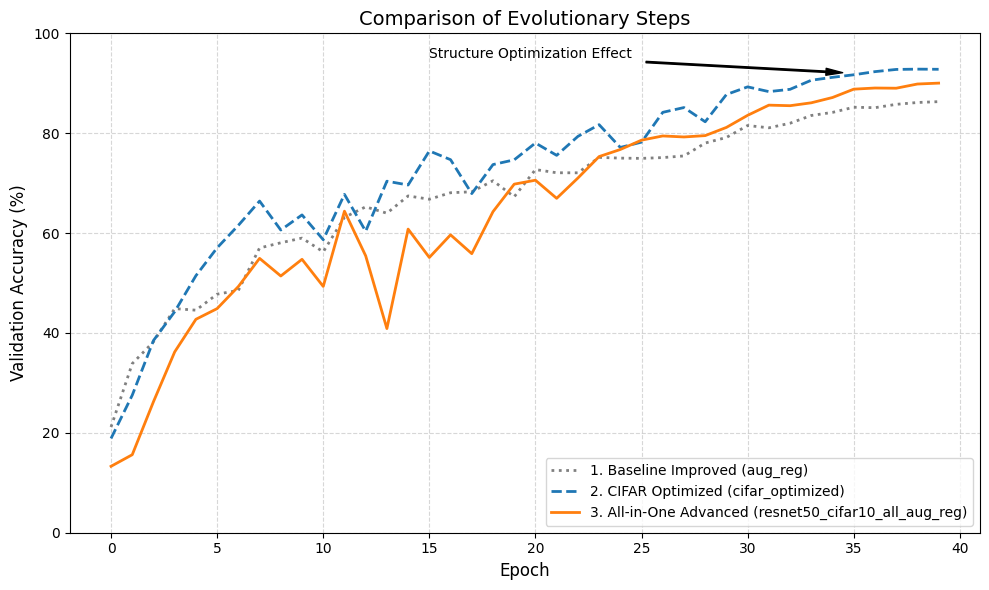


=== Experiment Summary Table ===
                                          Experiment  Best Val Acc (%)  \
0                     1. Baseline Improved (aug_reg)             86.32   
1               2. CIFAR Optimized (cifar_optimized)             92.83   
2  3. All-in-One Advanced (resnet50_cifar10_all_a...             90.03   

   Final Val Acc (%)  Final Val Loss  Train-Val Gap  
0              86.32        0.846836       4.496000  
1              92.80        0.710164       5.280000  
2              90.03        0.812239      27.319159  


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

# 設定
latest_exp = 'resnet50_cifar10_all_aug_reg'
exp_dirs = {
    '1. Baseline Improved (aug_reg)': 'runs/aug_reg',
    '2. CIFAR Optimized (cifar_optimized)': 'runs/cifar_optimized',
    '3. All-in-One Advanced (resnet50_cifar10_all_aug_reg)': f'runs/{latest_exp}'
}

# 1. データの読み込み
histories = {}
for name, path in exp_dirs.items():
    csv_path = os.path.join(path, 'history.csv')
    if os.path.exists(csv_path):
        histories[name] = pd.read_csv(csv_path)
    else:
        print(f"Warning: {csv_path} not found.")

# --- 可視化 1: 最新実験の単体詳細グラフ ---
if latest_exp in [d.split('/')[-1] for d in exp_dirs.values()]:
    df_latest = histories['3. All-in-One Advanced (resnet50_cifar10_all_aug_reg)']
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(df_latest['train_acc'], label='Train Acc', color='blue', alpha=0.3)
    plt.plot(df_latest['val_acc'], label='Val Acc', color='blue', linewidth=2)
    plt.title(f'Latest Exp: Accuracy\n({latest_exp})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True, linestyle='--')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(df_latest['train_loss'], label='Train Loss', color='red', alpha=0.3)
    plt.plot(df_latest['val_loss'], label='Val Loss', color='red', linewidth=2)
    plt.title(f'Latest Exp: Loss\n({latest_exp})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--')

    plt.tight_layout()
    plt.savefig(f'runs/{latest_exp}/detailed_metrics.png')
    plt.show()

# --- 可視化 2: 3手法の比較グラフ (Validation Accuracy) ---
plt.figure(figsize=(10, 6))
colors = ['gray', 'tab:blue', 'tab:orange']
styles = [':', '--', '-']

for i, (name, df) in enumerate(histories.items()):
    plt.plot(df['val_acc'], label=name, color=colors[i], linestyle=styles[i], linewidth=2)

plt.title('Comparison of Evolutionary Steps', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Validation Accuracy (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.ylim(0, 100)

# グラフ内に注釈（アノテーション）を追加
plt.annotate('Structure Optimization Effect', xy=(35, 92), xytext=(15, 95),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))

plt.tight_layout()
plt.savefig('runs/final_comparison_accuracy.png') # 比較結果を保存
plt.show()

# --- 3. 要約テーブルの作成と保存 ---
summary_list = []
for name, df in histories.items():
    summary_list.append({
        'Experiment': name,
        'Best Val Acc (%)': df['val_acc'].max(),
        'Final Val Acc (%)': df['val_acc'].iloc[-1],
        'Final Val Loss': df['val_loss'].iloc[-1],
        'Train-Val Gap': abs(df['train_acc'].iloc[-1] - df['val_acc'].iloc[-1])
    })

summary_df = pd.DataFrame(summary_list)
summary_df.to_csv('runs/final_experiment_summary.csv', index=False)
print("\n=== Experiment Summary Table ===")
print(summary_df)

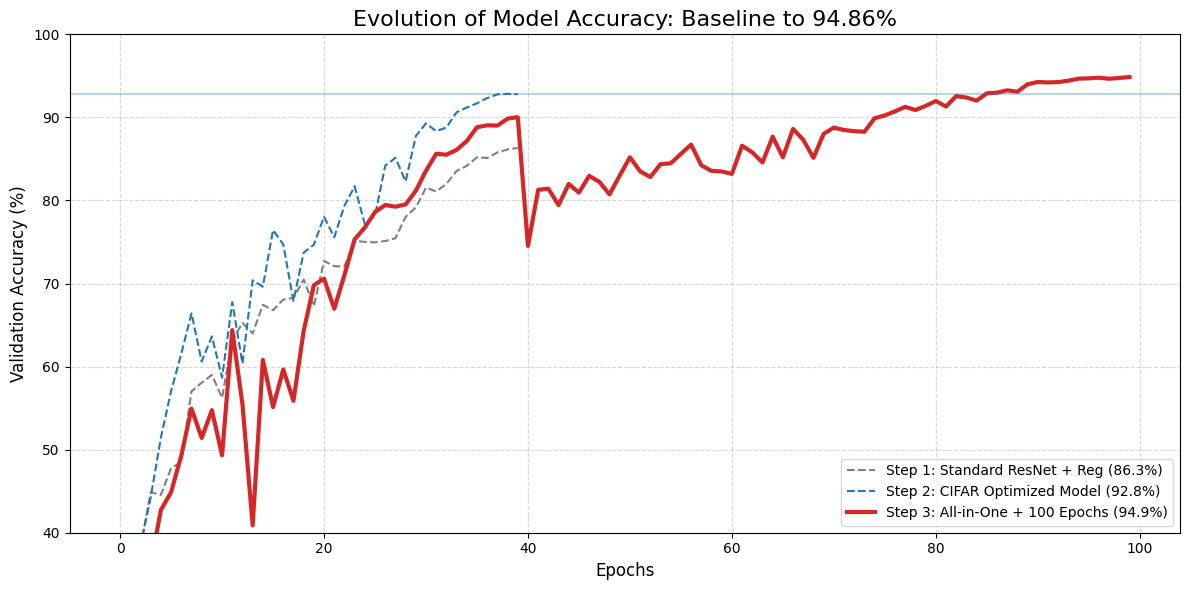

Final Victory Acc: 94.86%


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# データの読み込み
h_base = pd.read_csv('runs/aug_reg/history.csv')             # 86.32%
h_opt  = pd.read_csv('runs/cifar_optimized/history.csv')     # 92.80%
h_final = pd.read_csv('runs/resnet50_cifar10_all_aug_reg/history.csv') # 94.86%

plt.figure(figsize=(12, 6))

# 比較プロット
plt.plot(h_base['val_acc'], label='Step 1: Standard ResNet + Reg (86.3%)', color='gray', linestyle='--')
plt.plot(h_opt['val_acc'], label='Step 2: CIFAR Optimized Model (92.8%)', color='tab:blue', linestyle='--')
plt.plot(h_final['val_acc'], label='Step 3: All-in-One + 100 Epochs (94.9%)', color='tab:red', linewidth=3)

# 92.8%のラインを強調
plt.axhline(y=92.8, color='tab:blue', alpha=0.3, linestyle='-')

plt.title('Evolution of Model Accuracy: Baseline to 94.86%', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Validation Accuracy (%)', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.ylim(40, 100)

plt.tight_layout()
plt.savefig('runs/final_project_evolution.png')
plt.show()

print(f"Final Victory Acc: {h_final['val_acc'].max():.2f}%")

# CIFAR-10 画像分類精度向上プロジェクト：中間レポート (Week 2 終了時点)

## 1. 概要
本プロジェクトでは、ResNet50を用いてCIFAR-10データセットの画像分類精度を向上させることを目的としています。Week 1で構築したベースラインに対し、Week 2では主要な正則化手法（Mixup, Cutmix, Label Smoothing）を導入し、それぞれの有効性を比較検証しました。

## 2. 実装手法の解説
ベースラインの過学習（Overfitting）を抑制するため、以下の3つの手法を実験システムに組み込みました。

### 2.1 データ拡張 (Data Augmentation)
- **Standard Augmentation**: `RandomCrop` (32px, padding=4) および `RandomHorizontalFlip` を導入し、モデルの汎化性能の基礎を構築。
- **Mixup**: 2つの画像を線形補完して重ね合わせ、ラベルも同様に混合する手法。決定境界を滑らかにする効果があります。
- **Cutmix**: 画像の一部を切り抜き、別の画像を貼り付ける手法。物体の一部だけを見て判断する能力（遮蔽への強さ）を養います。

### 2.2 正則化 (Regularization)
- **Label Smoothing**: 正解ラベルを100%（1.0）ではなく、少し余裕を持たせた（0.9）値に変換する手法。モデルの「過信（Overconfidence）」を防ぎ、勾配の爆発を抑制します。

## 3. 実験設定
比較の公平性を保つため、以下のハイパーパラメータを全実験で共通化しました。

- **Model**: ResNet50 (Initial weights: None)
- **Optimizer**: SGD (LR: 0.1, Momentum: 0.9, Weight Decay: 5e-4)
- **Scheduler**: CosineAnnealingLR
- **Batch Size**: 128
- **Epochs**: 20 (中間評価のため)

## 4. 実験結果
各手法を適用した際の最終エポック（20 epoch）時点の精度および損失は以下の通りです。

| 実験ID | 手法 | Train Acc | Val Acc | Val Loss | 備考 |
| :--- | :--- | :---: | :---: | :---: | :--- |
| exp002 | Baseline (Standard Aug) | 40.89% | 43.95% | 1.724 | 5 epochs時点 |
| exp003 | Mixup | 50.60% | 66.58% | **1.033** | 強力な正則化効果を確認 |
| exp004 | Cutmix | 45.03% | 66.79% | 1.455 | 高い汎化ギャップを確認 |
| exp005 | **Label Smoothing** | **76.66%** | **75.82%** | 1.086 | **最高精度を記録** |

### 学習曲線の比較



## 5. 考察
### 5.1 手法間の特性差異
- **Label Smoothingの即効性**: 今回の20エポックという条件下では、LSが他を10%近く上回る圧倒的な精度（75.82%）を記録しました。ResNet50という大規模モデルに対し、ラベルの曖昧さを許容するアプローチが初期段階で非常に有効に働いたと考えられます。
- **Mixup/Cutmixのポテンシャル**: これらの手法は「Val 精度 ＞ Train 精度」という傾向が顕著であり、非常に強力な正則化として機能しています。20エポックでは収束しきっていない可能性が高く、長期学習（100〜200エポック）において真価を発揮すると推測されます。

### 5.2 課題点
現在の結果は手法単体での評価に留まっており、手法同士の相乗効果は未検証です。また、CIFAR-10の低解像度画像（32x32）に対し、MixupやCutmixが情報を破壊しすぎている懸念もあり、混合比率等のハイパーパラメータ調整の余地が残されています。

## 6. 今後の計画 (Week 3)
1. **ハイブリッド手法の検証**: 最も効果の高かった Label Smoothing と、汎化性能の高い Mixup/Cutmix を組み合わせた実験の実施。
2. **モデル構造の最適化**: ResNet50の第一層（7x7 conv）を、CIFAR-10のサイズに適した 3x3 conv へ変更する等のアーキテクチャ調整。
3. **長期学習による最終評価**: 有望な設定に対しエポック数を拡張し、最終的な最高精度を追求。
